In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
import matplotlib.patches as patches
import scipy.ndimage

%matplotlib inline

import glob

In [202]:
def plot_potts_model(H_all, N_cells_all, A_mean_all, A_min_all, A_max_all, GRIDS_all, ID_TO_TYPE_all, border_length_all, n_cell_id = 200):
    
    #fig = plt.figure(facecolor='w', figsize=(12,4), dpi=80)
    N = [100, 200, 400]
    cols = ['brown', 'purple', 'blue']
    plt.figure(figsize=(6,4))
    n = [10 * i for i in range(H_all[0].shape[1])] 
    for i in range(len(H_all)):
        H = H_all[i]
        plt.plot(n, np.mean(H, axis = 0) , cols[i],  label = 'N =  {}'.format(N=i))
        plt.errorbar(n,np.mean(H, axis = 0), yerr= np.std(H, axis = 0), color=cols[i], alpha = 0.002)
        plt.grid(b=True, which='major', c='k', alpha=0.2)
        plt.xlabel('n')
        plt.ylabel('H')
        plt.ticklabel_format(style='sci', axis = 'x', scilimits=(0,0))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6,4))
    for i in range(len(N_cells_all)):
        N_cells = N_cells_all[i]
        
        plt.plot(n, np.mean(N_cells, axis = 0) , cols[i],  label = 'N =  {}'.format(N=i))
        plt.errorbar(n,np.mean(N_cells, axis = 0), yerr= np.std(N_cells, axis = 0), color=cols[i], alpha = 0.002 )
        plt.grid(b=True, which='major', c='k', alpha=0.2)
        plt.xlabel('n')
        plt.ylabel('Amount of cells (N)')
        plt.ticklabel_format(style='sci', axis = 'x', scilimits=(0,0))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6,4))
    for i in range((len(A_mean_all))):
        A_mean = A_mean_all[i] 
        A_min = A_min_all[i]
        A_max = A_max_all[i]
        #plt.plot(np.mean
        plt.plot(n, np.mean(A_min, axis = 0), cols[i], linestyle = ':')
        plt.plot(n, np.mean(A_max, axis = 0), cols[i], linestyle = ':')
        plt.plot(n, np.mean(A_mean, axis = 0) , cols[i],  label = 'N =  {}'.format(N=i))
        plt.errorbar(n,np.mean(A_mean, axis = 0), yerr= np.std(A_mean, axis = 0), color=cols[i], alpha = 0.002 )
        plt.grid(b=True, which='major', c='k', alpha=0.2)
        plt.xlabel('n')
        #plt.ylim(np.min(N_cells) - 5, np.max(N_cells) + 5)
        plt.ylabel('Cell area')
        plt.ticklabel_format(style='sci', axis = 'x', scilimits=(0,0))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6,4))
    for i in range((len(border_length_all))):
        border = border_length_all[i] 
        plt.plot(n, np.mean(border, axis = 0) , cols[i],  label = 'N =  {}'.format(N=i))
        plt.errorbar(n,np.mean(border, axis = 0), yerr= np.std(border, axis = 0), color=cols[i], alpha = 0.002)
        plt.grid(b=True, which='major', c='k', alpha=0.2)
        plt.xlabel('n')
        #plt.ylim(np.min(N_cells) - 5, np.max(N_cells) + 5)
        plt.ylabel('total boundary length')
        plt.ticklabel_format(style='sci', axis = 'x', scilimits=(0,0))
    plt.legend()
    plt.show()
    
    plot_2D(n,GRIDS_all, ID_TO_TYPE_all)
    
    
    
    
    #ax.set_title('Magnetization modulus for J = %d' % J)
    
#     ax = plt.subplot2grid((1, 3), (0, 2))
#     #ax.matshow(id_to_type[grid[1:-1, 1:-1]], cmap = 'hot')

def plot_2D(n,GRIDS_all, ID_TO_TYPE_all, n_cell_id = 200):
    for j in range(len(GRIDS_all)):
        GRIDS = GRIDS_all[j]
        ID_TO_TYPE = ID_TO_TYPE_all[j]
        for i in range(5):
            id_to_type = ID_TO_TYPE[i]
            grid = GRIDS[i]
            plt.figure()

            highres_bord = scipy.ndimage.zoom(grid[1:-1, 1:-1], 20, order=0, mode='nearest') 
            highres_type = scipy.ndimage.zoom(id_to_type[grid[1:-1, 1:-1]], 20, order=0, mode= 'nearest')

            plt.imshow(highres_type, cmap = 'hot')
            plt.contour(highres_bord, levels = [i for i in range(n_cell_id + 1)], colors = 'blue', linewidths = .2)

            plt.title('n = %i' % n[-1])
            plt.axis('off')

            plt.tight_layout()
            plt.show()
        
        

In [215]:
##### VERSION 5

H_values_all = []
N_cells_all = []
A_mean_all = []
borders_all = []
grid_all = []
translate_all = []
A_min_all = []
A_max_all = []
for j in [1,2,3]:
    H_values = np.zeros((5,20001))
    i = 0
    for np_name in glob.glob('H_V{}_*.np[yz]'.format(j)):
        #print(np_name)
        H_values[i,:] = np.load(np_name)
        i += 1
    H_values_all.append(H_values)
    
    i = 0
    N_cells = np.zeros((5, 20001))
    for np_name in glob.glob('N_CELLS_V{}_*.np[yz]'.format(j)):
        #print(np_name)
        N_cells[i,:] = np.load(np_name)
        i += 1
    N_cells_all.append(N_cells)

    i = 0
    A_mean = np.zeros((5, 20001))
    for np_name in glob.glob('A_MEAN_V{}_*.np[yz]'.format(j)):
        #print(np_name)
        A_mean[i,:] = np.load(np_name)
        #print(np.load(np_name))
        i += 1
    A_mean_all.append(A_mean)
    
    i = 0
    A_max = np.zeros((5, 20001))
    for np_name in glob.glob('A_MAX_V{}_*.np[yz]'.format(j)):
        print(np_name)
        A_max[i,:] = np.load(np_name)
        #print(np.load(np_name))
        i += 1
    A_max_all.append(A_max)
    
    i = 0
    A_min = np.zeros((5, 20001))
    for np_name in glob.glob('A_MIN_V{}_*.np[yz]'.format(j)):
        print(np_name)
        A_min[i,:] = np.load(np_name)
        #print(np.load(np_name))
        i += 1
    A_min_all.append(A_min)
    
    i = 0
    GRIDS = np.zeros((5,52,52), dtype = int)
    for np_name in glob.glob('FINAL_GRID_V{}_*.np[yz]'.format(j)):
        print(np_name)
        GRIDS[i,:] = np.load(np_name)
        #print(GRIDS[i][0,:])
        #print(GRIDS[i][5,:])
        i += 1
    grid_all.append(GRIDS)

    i = 0
    ID_TO_TYPES = np.zeros((5,201), dtype = int)
    for np_name in glob.glob('ID_TO_TYPE_V{}_*.np[yz]'.format(j)):
        print(np_name)
        ID_TO_TYPES[i,:] = np.load(np_name)
        print(np.load(np_name))
        i += 1
    translate_all.append(ID_TO_TYPES)
    print('id',ID_TO_TYPES)
    i = 0
    borders = np.zeros((5,20001))
    for np_name in glob.glob('BORD_LENGTH_V{}_*.np[yz]'.format(j)):
        print(np_name)
        #borders[i,:] = np.load(np_name)
        print(np.load(np_name))
        i += 1
    borders_all.append(A_mean)
        

print(ID_TO_TYPES[0])


A_MAX_V6_0.npy
A_MAX_V6_1.npy
A_MAX_V6_2.npy
A_MAX_V6_3.npy
A_MAX_V6_4.npy
A_MIN_V6_0.npy
A_MIN_V6_1.npy
A_MIN_V6_2.npy
A_MIN_V6_3.npy
A_MIN_V6_4.npy
FINAL_GRID_V6_0.npy
FINAL_GRID_V6_1.npy
FINAL_GRID_V6_2.npy
FINAL_GRID_V6_3.npy
FINAL_GRID_V6_4.npy
ID_TO_TYPE_V6_0.npy
[0 2 1 2 2 2 1 2 1 1 2 2 1 1 1 2 2 1 1 1 1 2 2 1 2 2 1 1 1 2 2 1 1 1 2 1 1
 1 1 1 2 1 1 2 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1
 2 2 1 1 1 2 1 2 2 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 2
 2 2 2 2 2 1 2 2 2 2 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 2 1 2 1 2 2 1 2 1
 1 2 2 1 2 1 2 2 1 1 1 2 1 2 2 1 1 2 2 2 2 1 1 1 1 1 2 1 1 2 2 2 2 1 2 1 1
 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 1]
ID_TO_TYPE_V6_1.npy
[0 2 1 2 2 2 1 2 1 1 2 2 1 1 1 2 2 1 1 1 1 2 2 1 2 2 1 1 1 2 2 1 1 1 2 1 1
 1 1 1 2 1 1 2 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 1
 2 2 1 1 1 2 1 2 2 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 2
 2 2 2 2 2 1 2 2 2 2 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 2 1 2 1 2 2 1 2 1
 

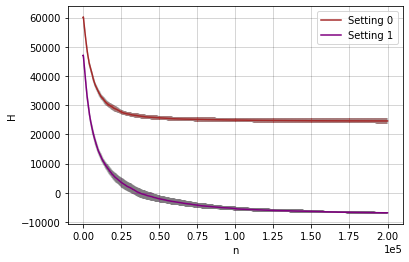

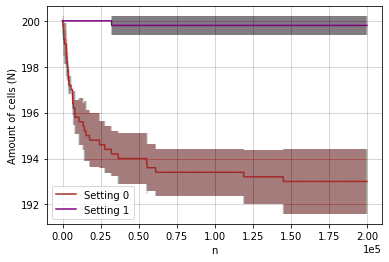

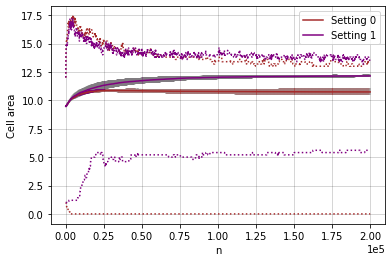

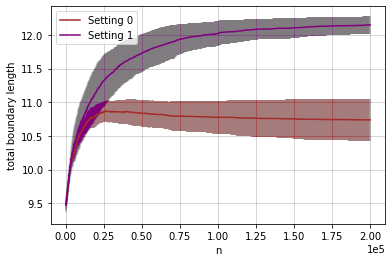

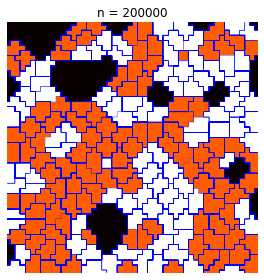

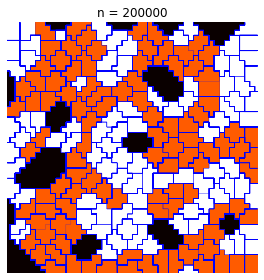

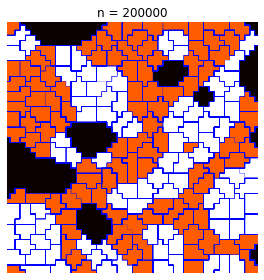

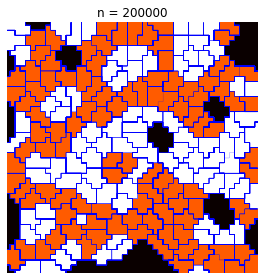

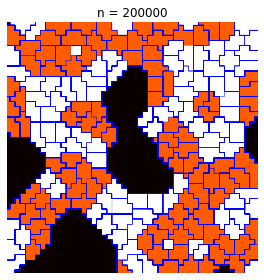

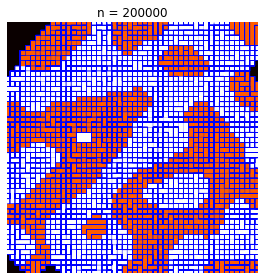

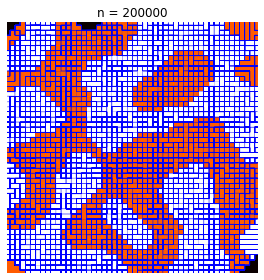

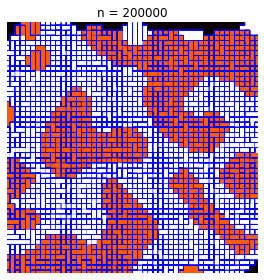

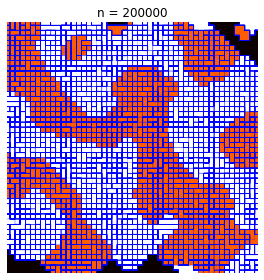

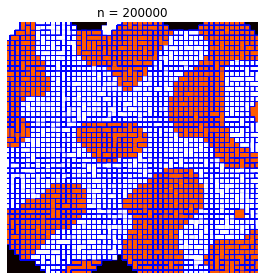

In [216]:
plot_potts_model(H_values_all, N_cells_all, A_mean_all, A_min_all, A_max_all, grid_all, translate_all, borders_all)

FINAL_GRID_V7_0.npy
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0 136 136   6   6  32   0   0   0   0   0   0   0   0   0   0
   0  94  94  94 116 116 116 123 123  18  18  18   0   0   0   0   0   0
   0   0 166 166   2   2   2 168 168 168  51  51  51  74  74   0]
FINAL_GRID_V7_1.npy
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0 135 135 135 135 148 148 148   4   4  46  46  46  46  33  33  33 130
 130 130 130 142 142 142 142  93  93  93  93 121 121 121  42  42  42 185
 140 140 140 133  41  41  41   7   7   7   7  40  39  39  39   0]
FINAL_GRID_V7_2.npy
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0 152 152 152  42  42   6   6   6  65   7   7   7  99 103 103  61  61
  61   0   0   0   0   0   8   8 129 129 154 154   0   0   0   0   0   0
  94  94  94  94 177 177 177 118 118 118  39  39 

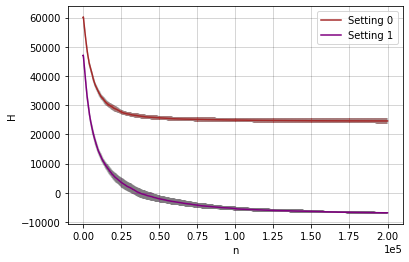

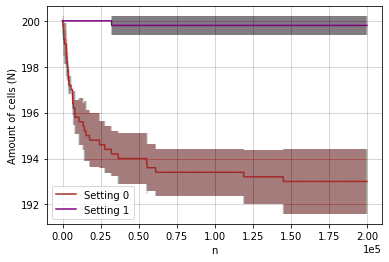

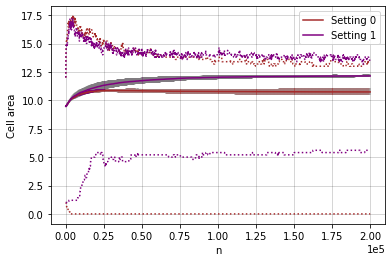

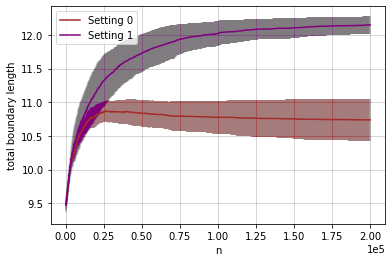

In [217]:
i = 0
j = 7
grid_all_3 = []
translate_all_3 = []
GRIDS = np.zeros((5,52,52), dtype = int)
for np_name in glob.glob('FINAL_GRID_V{}_*.np[yz]'.format(j)):
    print(np_name)
    GRIDS[i,:] = np.load(np_name)
    print(GRIDS[i][0,:])
    print(GRIDS[i][5,:])
    i += 1
grid_all.append(GRIDS)

i = 0
translate_all = []
ID_TO_TYPES = np.zeros((5,201), dtype = int)
for np_name in glob.glob('ID_TO_TYPE_V5_*.np[yz]'):
    print(np_name)
    ID_TO_TYPES[i,:] = np.load(np_name)
    i += 1
translate_all.append(ID_TO_TYPES)

plot_potts_model(H_values_all, N_cells_all, A_mean_all, A_min_all, A_max_all, grid_all_3, translate_all_3, borders_all)